In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
from subprocess import check_output

In [2]:
# ファイルの確認
print(check_output(["ls", "./"]).decode("utf-8"))

test.csv
titanic.ipynb
train.csv



In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 行数確認
print("train: {}".format(df_train.shape))
print("test: {}".format(df_test.shape))

train: (891, 12)
test: (418, 11)


In [6]:
# 列名の確認
print(df_train.columns)
print('*' * 50)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
**************************************************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# 概要の確認
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# 欠損値の確認
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 要約統計量の確認

In [11]:
# trainとtestをconcat
df_full = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [12]:
print(df_full.shape)

(1309, 12)


In [13]:
df_full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### わかったこと
- Survived列
  - 生存者の平均は0.38、約4割である。

In [14]:
df_full.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


### 死亡者と生存者の可視化

0    549
1    342
Name: Survived, dtype: int64

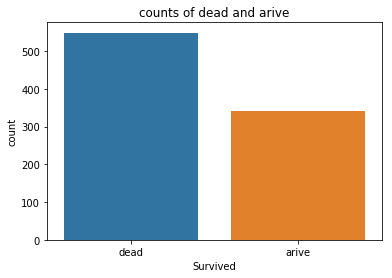

In [15]:
sns.countplot('Survived', data=df_train)
plt.title('counts of dead and alived')
plt.xticks([0, 1], ['dead', 'alived'])

df_train['Survived'].value_counts()

,Survived
Sex,
female,0.742038
male,0.188908


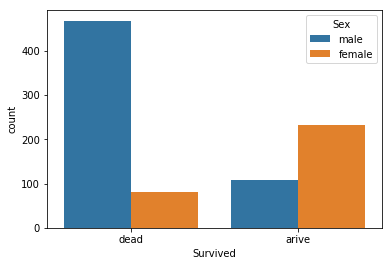

In [16]:
# 男女別の生存者と死亡者数
sns.countplot(x='Survived', hue='Sex', data=df_train)

plt.xticks([0, 1], ['dead', 'alived'])

# 男女別の生存割合を表示
df_train[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


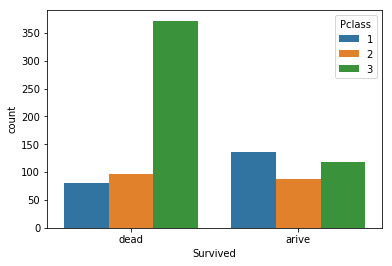

In [17]:
# チケットクラス別の死亡者数と生存者数
sns.countplot(x='Survived', hue='Pclass', data=df_train)

plt.xticks([0, 1], ['dead', 'alived'])

# チケット別の生存者の割合
df_train[['Survived', 'Pclass']].groupby(['Pclass']).mean()

- 1st以外は生存者数より死亡者数の方が多い

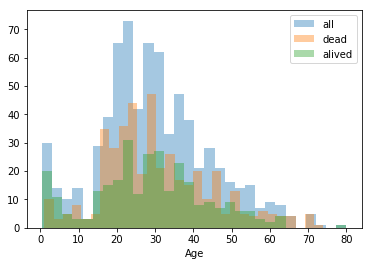

In [19]:
# 年齢の分布

# 全体のヒストグラム
sns.distplot(df_train['Age'].dropna(), kde=False, bins=30, label='all')

# 死亡者のヒストグラム
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde=False, bins=30, label='dead')

# 生存者のヒストグラム
sns.distplot(df_train[df_train['Survived'] == 1].Age.dropna(), kde=False, bins=30, label='alived')

plt.legend()

In [20]:
# 年齢の分布を8等分
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 8)

# categoricalAgeをグルーピングしてSurvivedの平均を出す
df_train[['Survived', 'CategoricalAge']].groupby(['CategoricalAge'], as_index=False).mean()

,CategoricalAge,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.365217
3,"(30.263, 40.21]",0.445161
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


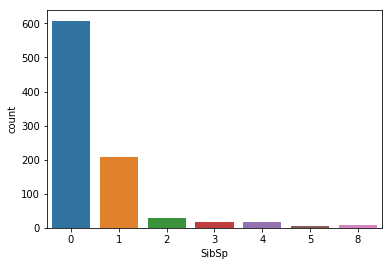

In [21]:
# 兄弟・配偶者の数
sns.countplot(x='SibSp', data=df_train)

,Survived
SibSp_0_1_2over,
0,0.345395
1,0.535885
2,0.270270


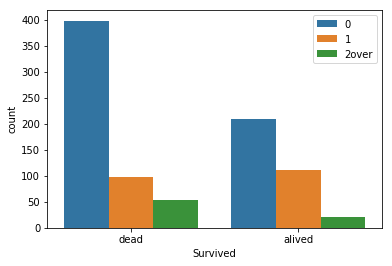

In [27]:
# 同乗している両親・子供の数と生存者・死亡者のとの関係
df_train['SibSp_0_1_2over'] = [i if i <= 1 else 2 for i in df_train['SibSp']]

sns.countplot(x='Survived', hue='SibSp_0_1_2over', data=df_train)
plt.legend(['0', '1', '2over'])
plt.xticks([0, 1], ['dead', 'alived'])
df_train[['Survived', 'SibSp_0_1_2over']].groupby(['SibSp_0_1_2over']).mean()

In [28]:
# SibSpとParchが同乗している家族の数。1を足すと家族の人数になる。
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [31]:
# IsAloneを0、FamilySizeが1ならIsAloneを1にする
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize']==1,'IsAlone']=  1

([<matplotlib.axis.XTick at 0x1a210b74a8>,
 <a list of 2 Text xticklabel objects>)

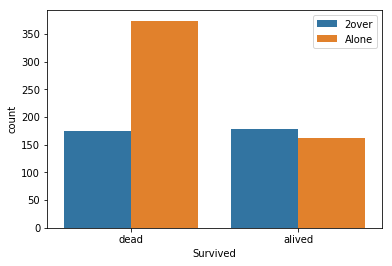

In [33]:
sns.countplot(x='Survived', hue='IsAlone', data=df_train)
plt.legend(['2over', 'Alone'])
plt.xticks([0, 1], ['dead', 'alived'])

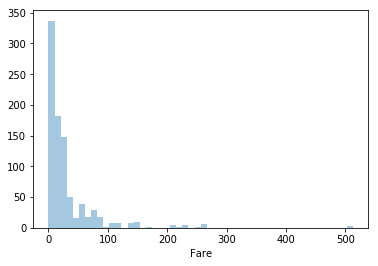

In [34]:
# 運賃の分布
sns.distplot(df_train['Fare'].dropna(), kde=False, hist=True)

In [35]:
df_train['CategoricalFare'] = pd.qcut(df_train['Fare'], 4)

In [36]:
df_train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


運賃が高くなるにつれて、生存率が高くなっている

In [38]:
# 名前の処理
df_train['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [39]:
# 敬称を抽出し、重複を省く
set(df_train.Name.str.extract('([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [40]:
# それぞれの敬称がいくつ含まれるか
import collections
collections.Counter(df_train.Name.str.extract('([A-Za-z]+)\.', expand=False))

Counter({'Capt': 1,
         'Col': 2,
         'Countess': 1,
         'Don': 1,
         'Dr': 7,
         'Jonkheer': 1,
         'Lady': 1,
         'Major': 2,
         'Master': 40,
         'Miss': 182,
         'Mlle': 2,
         'Mme': 1,
         'Mr': 517,
         'Mrs': 125,
         'Ms': 1,
         'Rev': 6,
         'Sir': 1})

In [41]:
df_train['Title'] = df_train.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [42]:
df_test['Title'] = df_test.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [45]:
df_train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [46]:
# 名称を新しい特徴量とする
def title_to_num(title):
    if df_train['Title'] == 'Master':
        return 1
    elif df_train['Title'] == 'Miss':
        return 2
    elif df_train['Title'] == 'Mr':
        return 3
    elif df_train['Title'] == 'Mrs':
        return 4
    else:
        return 5

    
df_train['Title_num'] = [title_to_num(i) for i in df_train['Title']]
df_test['Title_num'] = [title_to_num(i) for i in df_test['Title']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().